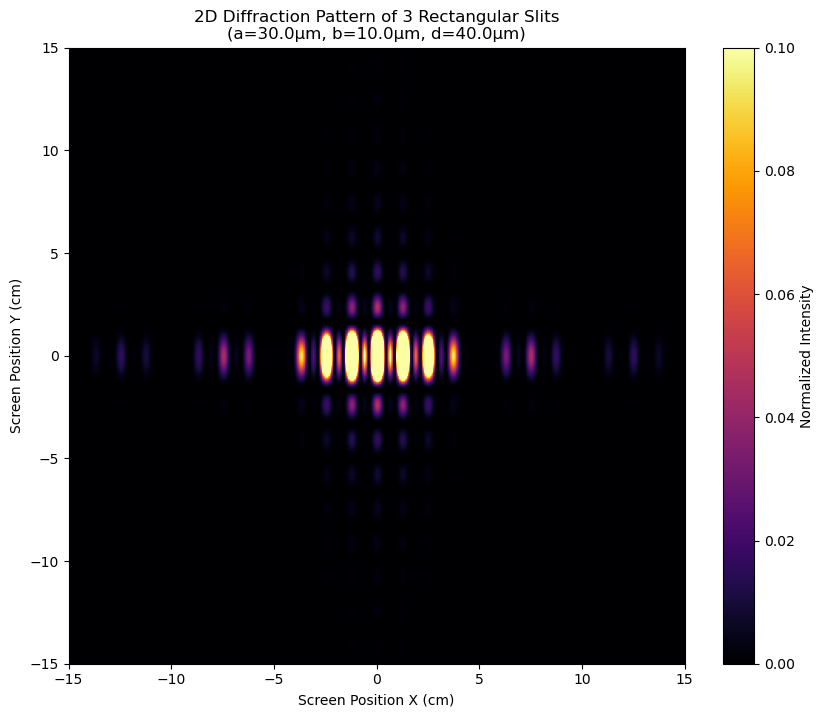

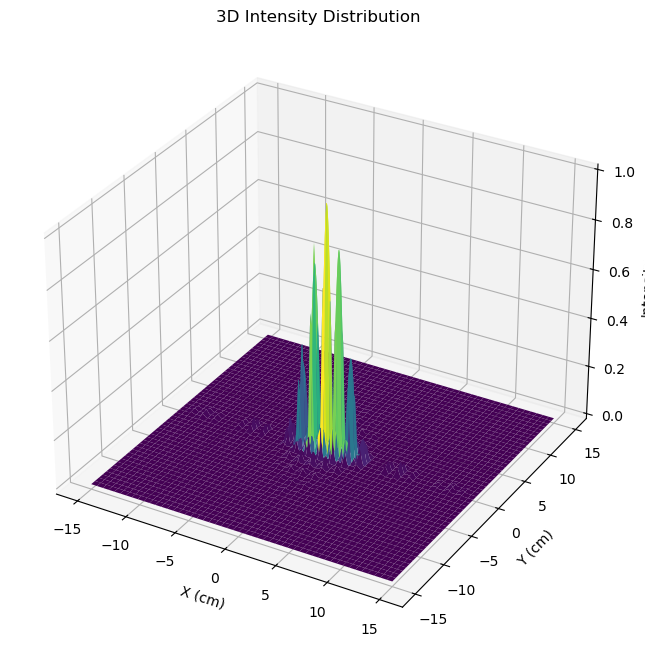

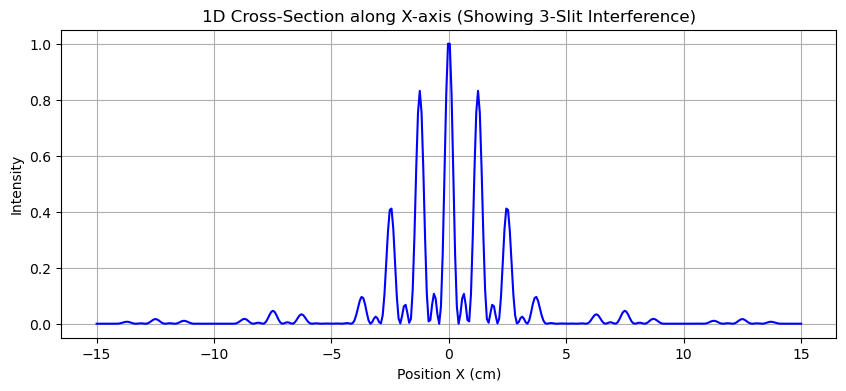

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#  PARAMETERS

wavelength = 500e-9   # 500 nm (Green light)
b = 10e-6             # Slit width (x-axis) - 10 microns
a = 30e-6             # Slit length (y-axis) - 30 microns (a > b)
d = 40e-6             # Slit separation - 40 microns
D = 1.0               # Distance to screen (meters)

# Define screen coordinates (in meters)
side_length = 0.15    # Size of the screen area to plot
N = 400               # Resolution
x = np.linspace(-side_length, side_length, N)
y = np.linspace(-side_length, side_length, N)
X, Y = np.meshgrid(x, y)


# 2. CALCULATE INTENSITY

sin_theta_x = X / D
sin_theta_y = Y / D

k = 2 * np.pi / wavelength

beta_x = (k * b * sin_theta_x) / 2
beta_y = (k * a * sin_theta_y) / 2

delta = k * d * sin_theta_x

# INTENSITY 

diffraction_envelope = (np.sinc(beta_x / np.pi)**2) * (np.sinc(beta_y / np.pi)**2)
interference_term = (1 + 2 * np.cos(delta))**2

# Total Intensity (Normalized)
I = diffraction_envelope * interference_term
I = I / np.max(I)  # Normalize max to 1


# 3. PLOTTING


# --- Plot 1: 2D Intensity Map (The "Image" on the screen) ---
plt.figure(figsize=(10, 8))
plt.imshow(I, extent=[-side_length*100, side_length*100, -side_length*100, side_length*100], 
           cmap='inferno', vmax=0.1) # vmax saturates the center to show faint fringes
plt.colorbar(label='Normalized Intensity')
plt.title(f'2D Diffraction Pattern of 3 Rectangular Slits\n(a={a*1e6}µm, b={b*1e6}µm, d={d*1e6}µm)')
plt.xlabel('Screen Position X (cm)')
plt.ylabel('Screen Position Y (cm)')
plt.show()

# --- Plot 2: 3D Surface Plot ---
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Plot a subset of data for speed (every 2nd point)
surf = ax.plot_surface(X*100, Y*100, I, cmap='viridis', edgecolor='none')
ax.set_title('3D Intensity Distribution')
ax.set_xlabel('X (cm)')
ax.set_ylabel('Y (cm)')
ax.set_zlabel('Intensity')
ax.set_zlim(0, 1)
plt.show()

# --- Plot 3: 1D Cross Section (X-axis) ---
plt.figure(figsize=(10, 4))
center_idx = N // 2
plt.plot(x*100, I[center_idx, :], color='blue')
plt.title('1D Cross-Section along X-axis (Showing 3-Slit Interference)')
plt.xlabel('Position X (cm)')
plt.ylabel('Intensity')
plt.grid(True)
plt.show()